<a href="https://colab.research.google.com/github/Namratha2604/Machine_learning-project-1/blob/main/Copy_of_Airline_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Invistico_Airline.csv to Invistico_Airline (1).csv


## Data Cleansing

In [ ]:
#Reading csv file
data = pd.read_csv("Invistico_Airline.csv")

In [ ]:
#What the data looks like
data.head()


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
#SIZE OF DATA
data.shape

(129880, 23)

In [ ]:
#STORING DATA IN A VARIABLE NAMED ORIGINAL
original =data


# Treating  null values in each column

In [ ]:
#TELLING THE SUM OF NULL VALUES IN COLUMN
data.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [ ]:
#filling minutes  na value with median
data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median(axis = 0), inplace = True)

In [ ]:
#checking for null values
data.isna().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [ ]:
#TYPE OF DATA IN EACH COLUMN
data.dtypes

satisfaction                          object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival De

In [ ]:
data['On-board service'].value_counts()

4    40675
5    31724
3    27037
2    17174
1    13265
0        5
Name: On-board service, dtype: int64

In [ ]:
#CHECKING FOR DUPLICATE DATA
data.duplicated().sum()


0

# Outlier Treatment

Text(0.5, 1.0, 'Departure delay in minute boxplot')

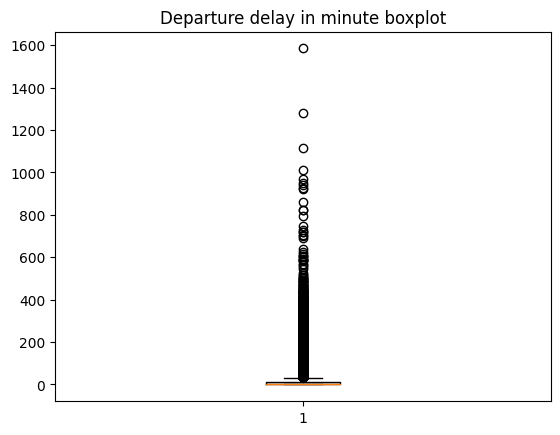

In [ ]:
plt.boxplot(data['Arrival Delay in Minutes'])
plt.title("Departure delay in minute boxplot")

Text(0.5, 1.0, 'Arrival delay in Minute boxplot')

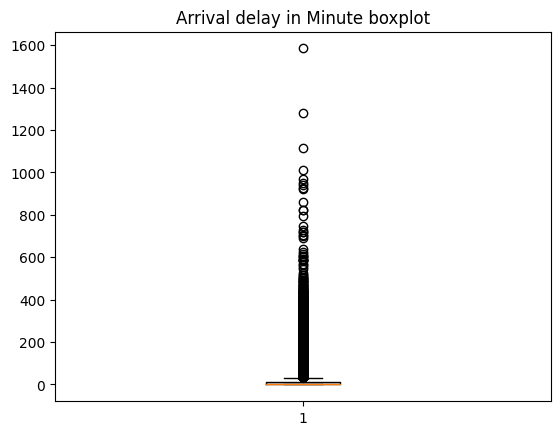

In [ ]:
plt.boxplot(data['Arrival Delay in Minutes'])
plt.title("Arrival delay in Minute boxplot")

In [ ]:
#implements a function called fill_outliers_with_mean that replaces outliers in a dataset with the mean value of the dataset.
#The function uses the interquartile range (IQR) method to identify outliers.


def fill_outliers_with_mean(data, threshold=1.5):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr

    outliers = (data < lower_bound) | (data > upper_bound)
    data[outliers] = np.mean(data)
    return data

In [ ]:
fill_outliers_with_mean(data['Departure Delay in Minutes'])
fill_outliers_with_mean(data['Arrival Delay in Minutes'])

<ipython-input-17-c5b6741ff811>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[outliers] = np.mean(data)


0          0.000000
1         15.045465
2          0.000000
3          0.000000
4          0.000000
            ...    
129875     0.000000
129876    15.045465
129877    15.045465
129878    15.045465
129879    15.045465
Name: Arrival Delay in Minutes, Length: 129880, dtype: float64

Text(0.5, 1.0, 'Departure delay in minute boxplot')

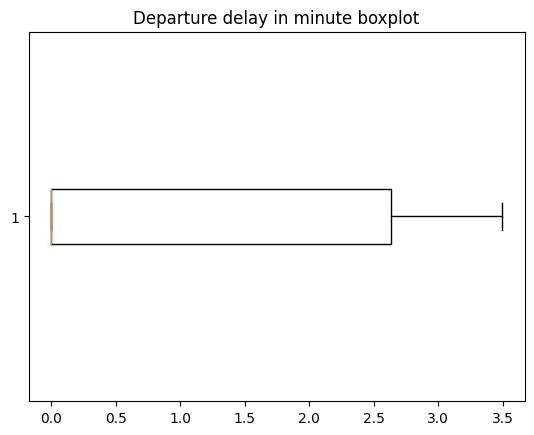

In [ ]:
data['Arrival Delay in Minutes']=np.log1p(data['Arrival Delay in Minutes'])
plt.boxplot((data['Arrival Delay in Minutes']),vert=False)
plt.title("Departure delay in minute boxplot")

Text(0.5, 1.0, 'Arrival delay in Minute boxplot')

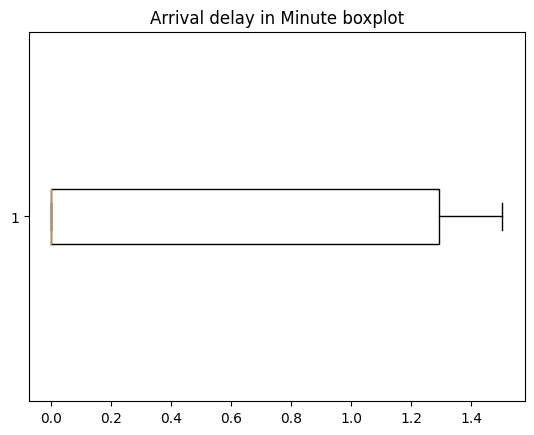

In [ ]:
data['Arrival Delay in Minutes']=np.log1p(data['Arrival Delay in Minutes'])
plt.boxplot(data['Arrival Delay in Minutes'],vert=False)
plt.title("Arrival delay in Minute boxplot")

In [ ]:
#INFO ABOUT DATA
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [ ]:
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0.000000,0.000000
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,14.713713,1.328513
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0.000000,0.000000
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0.000000,0.000000
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0.000000,0.000000


In [ ]:
# All Columns
data.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [ ]:
#LABEL ENCODING
le = LabelEncoder()
data['satisfaction'] = le.fit_transform(data['satisfaction'])
data['Gender'] = le.fit_transform(data['Gender'])
data['Customer Type'] = le.fit_transform(data['Customer Type'])
data['Type of Travel'] = le.fit_transform(data['Type of Travel'])
data['Class'] = le.fit_transform(data['Class'])

In [ ]:
data

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,0,65,1,1,265,0,0,0,...,2,3,3,0,3,5,3,2,0.000000,0.000000
1,1,1,0,47,1,0,2464,0,0,0,...,2,3,4,4,4,2,3,2,14.713713,1.328513
2,1,0,0,15,1,1,2138,0,0,0,...,2,2,3,3,4,4,4,2,0.000000,0.000000
3,1,0,0,60,1,1,623,0,0,0,...,3,1,1,0,1,4,1,3,0.000000,0.000000
4,1,0,0,70,1,1,354,0,0,0,...,4,2,2,0,2,4,2,5,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,0,1,29,1,1,1731,5,5,5,...,2,2,3,3,4,4,4,2,0.000000,0.000000
129876,0,1,1,63,1,0,2087,2,3,2,...,1,3,2,3,3,1,2,1,14.713713,1.328513
129877,0,1,1,69,1,1,2320,3,0,3,...,2,4,4,3,4,2,3,2,14.713713,1.328513
129878,0,1,1,66,1,1,2450,3,2,3,...,2,3,3,2,3,2,1,2,14.713713,1.328513


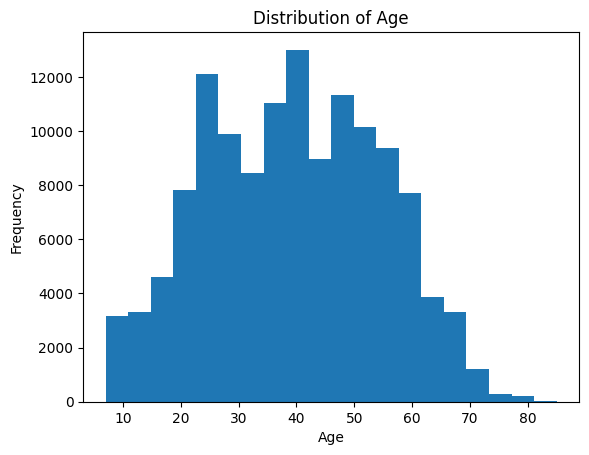

In [ ]:
#histogram of the Age column
plt.hist(data['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

Text(0.5, 1.0, 'grp of age')

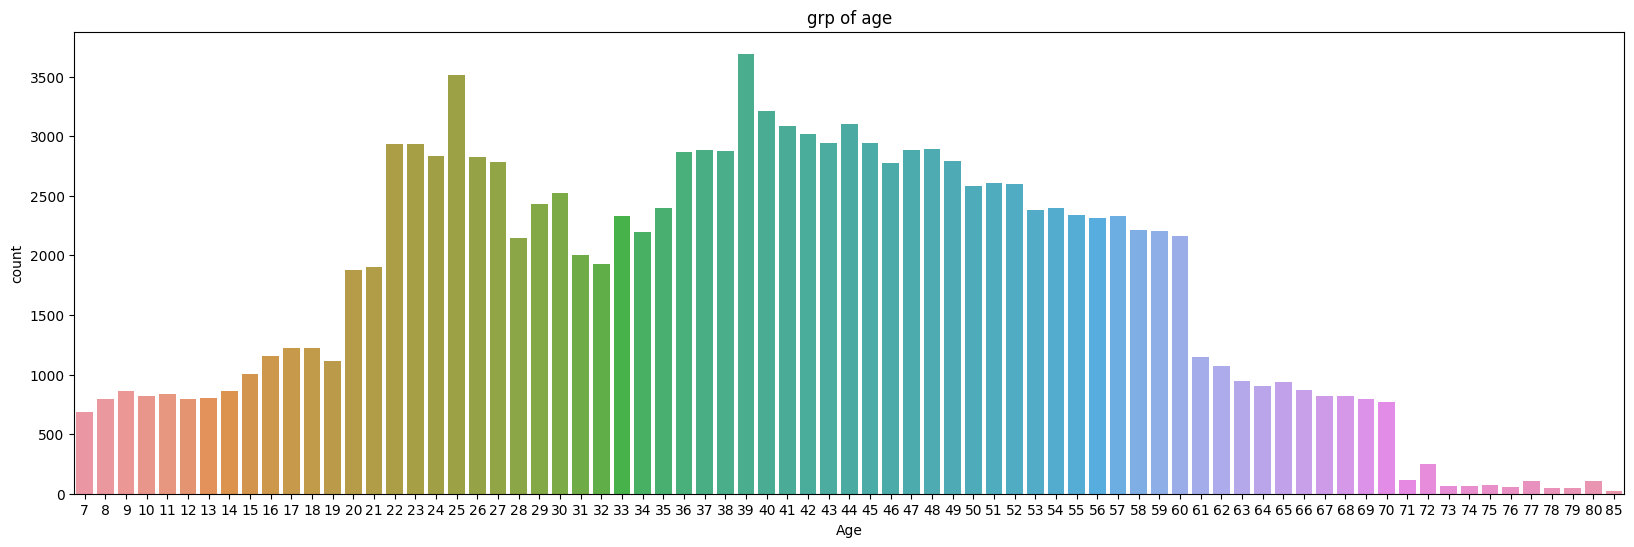

In [ ]:
#BAR PLOT OF AGE GROUP
fig, ax = plt.subplots(figsize=(20, 6))
sns.countplot(x ='Age', data =data,ax=ax).set_title("grp of age")

MAXIMUM OF AGE 40 TRAVEL

Text(0.5, 1.0, 'Gender')

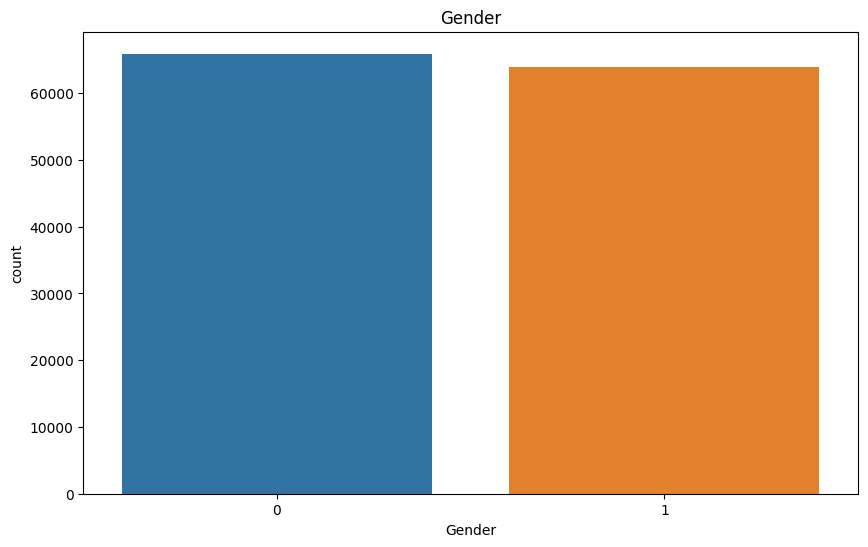

In [ ]:
#bar plot according to gender 0 is for female
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x ='Gender', data =original,ax=ax).set_title("Gender")


BOTH MALE AND FEMALE IN EQUAL PROPORTION TRAVEL BY PLANE

Text(0.5, 1.0, 'class')

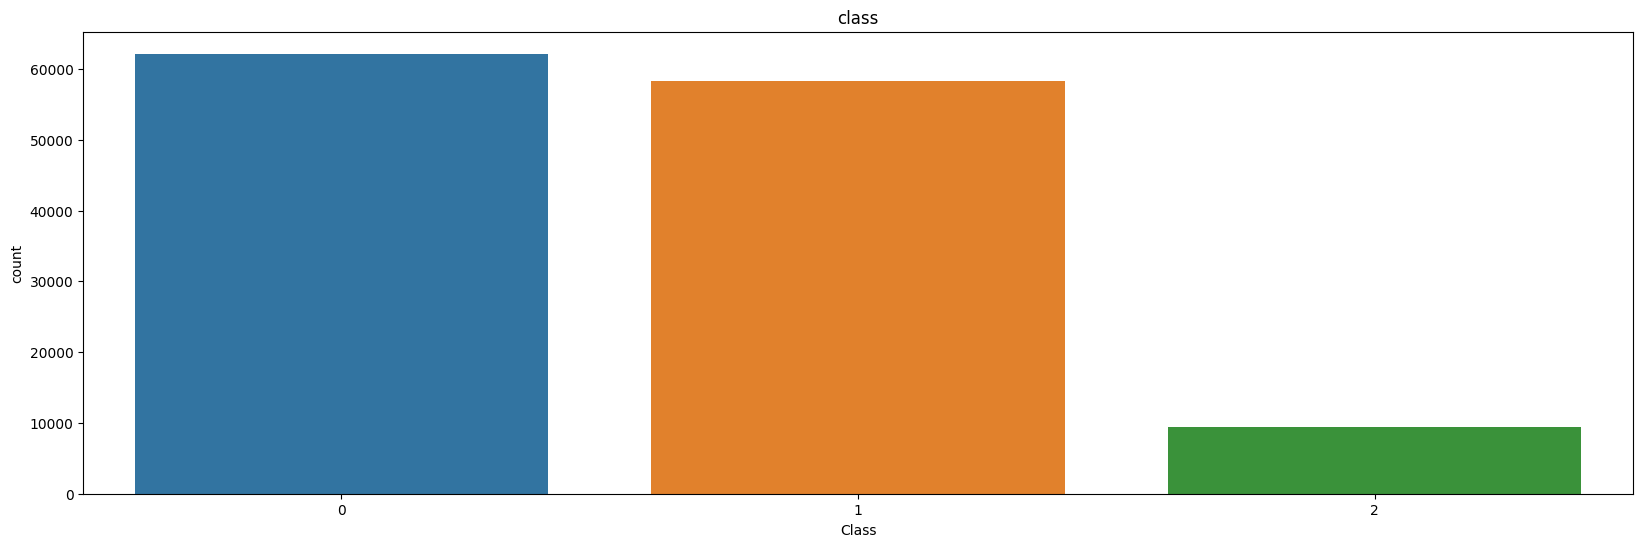

In [ ]:
#BAR GRAPH OF THE CLASSES TRAVELLED
fig, ax = plt.subplots(figsize=(20, 6))
sns.countplot(x ='Class', data=data,ax=ax).set_title("class")

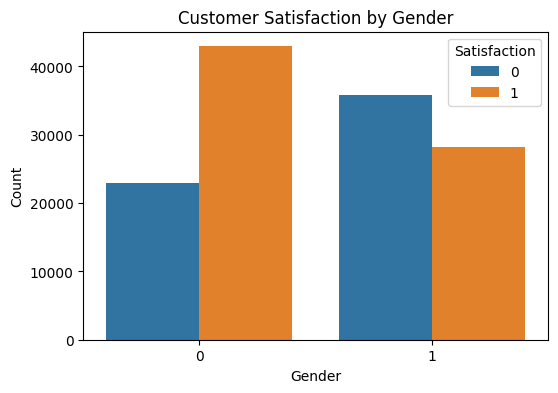

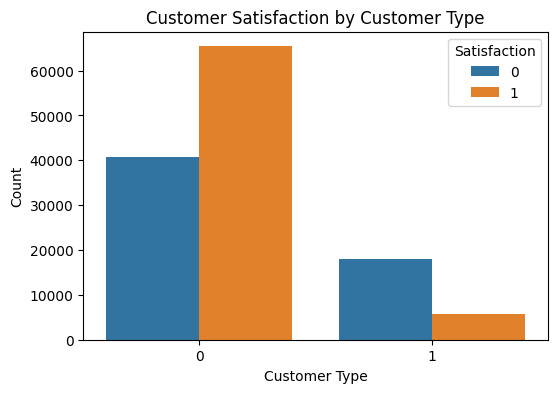

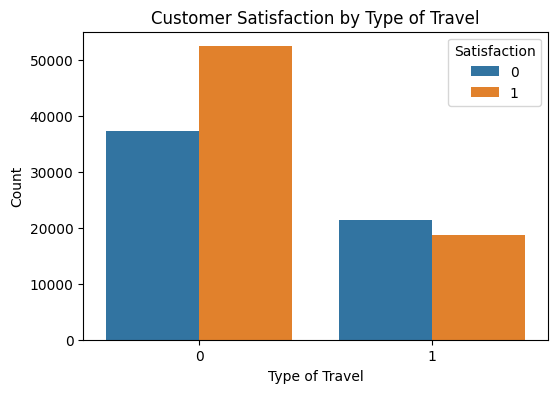

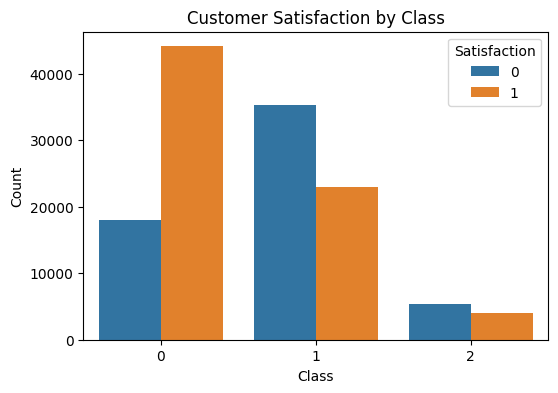

In [ ]:
#Compare customer satisfaction across different categories
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

# Iterate through each categorical column
for col in categorical_columns:
    # Create a new figure with the specified size
    plt.figure(figsize=(6, 4))

    # Create a countplot to compare customer satisfaction by the current categorical column
    sns.countplot(data=data, x=col, hue='satisfaction')

    # Set the title of the plot
    plt.title('Customer Satisfaction by {}'.format(col))

    # Set the labels for x-axis and y-axis
    plt.xlabel(col)
    plt.ylabel('Count')

    # Add a legend for the satisfaction categories
    plt.legend(title='Satisfaction', loc='upper right')

    # Display the plot
    plt.show()

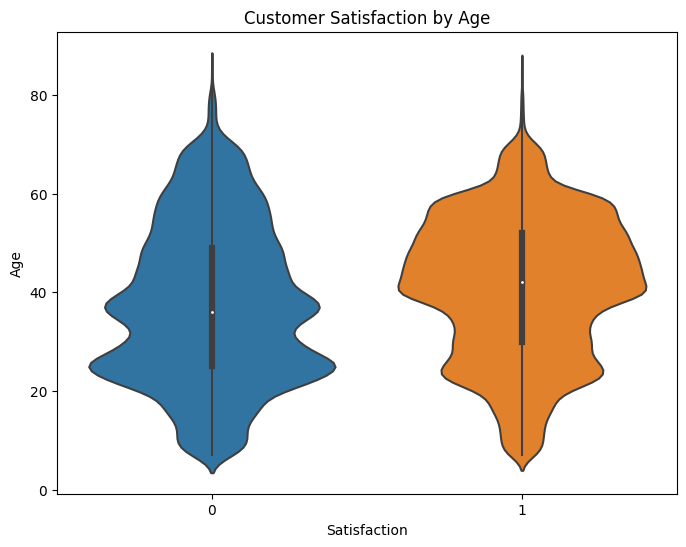

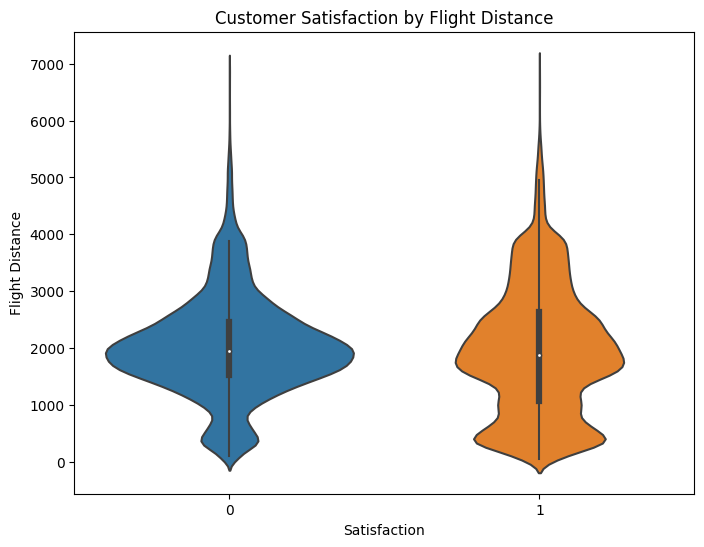

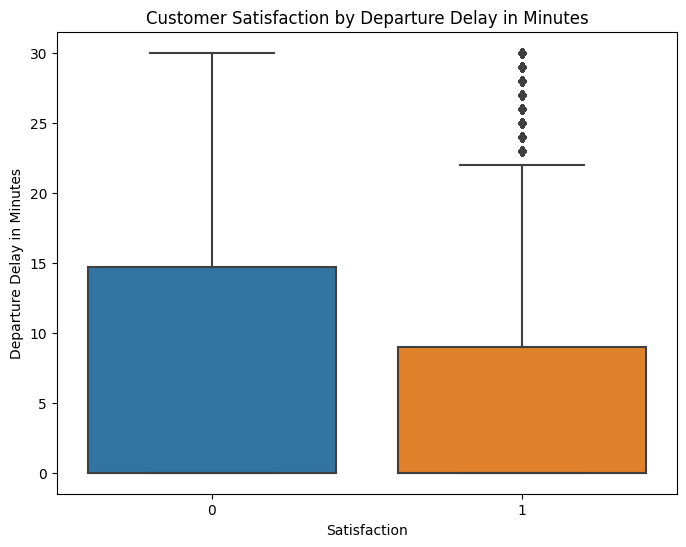

In [ ]:
# Variables to analyze satisfaction across different categories
Numerical_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes']

# Iterate through each variable
for variable in Numerical_columns:
    plt.figure(figsize=(8, 6))

    # Create a violin plot to compare satisfaction across the variable
    if variable == 'Departure Delay in Minutes':
        # For 'Departure Delay in Minutes', use a box plot instead of a violin plot
        sns.boxplot(data=data, x='satisfaction', y=variable)
    else:
        # For other numerical variables, use a violin plot
        sns.violinplot(data=data, x='satisfaction', y=variable)

    # Set the title of the plot
    plt.title('Customer Satisfaction by {}'.format(variable))

    # Set the x-axis label
    plt.xlabel('Satisfaction')

    # Set the y-axis label
    plt.ylabel(variable)

    # Display the plot
    plt.show()

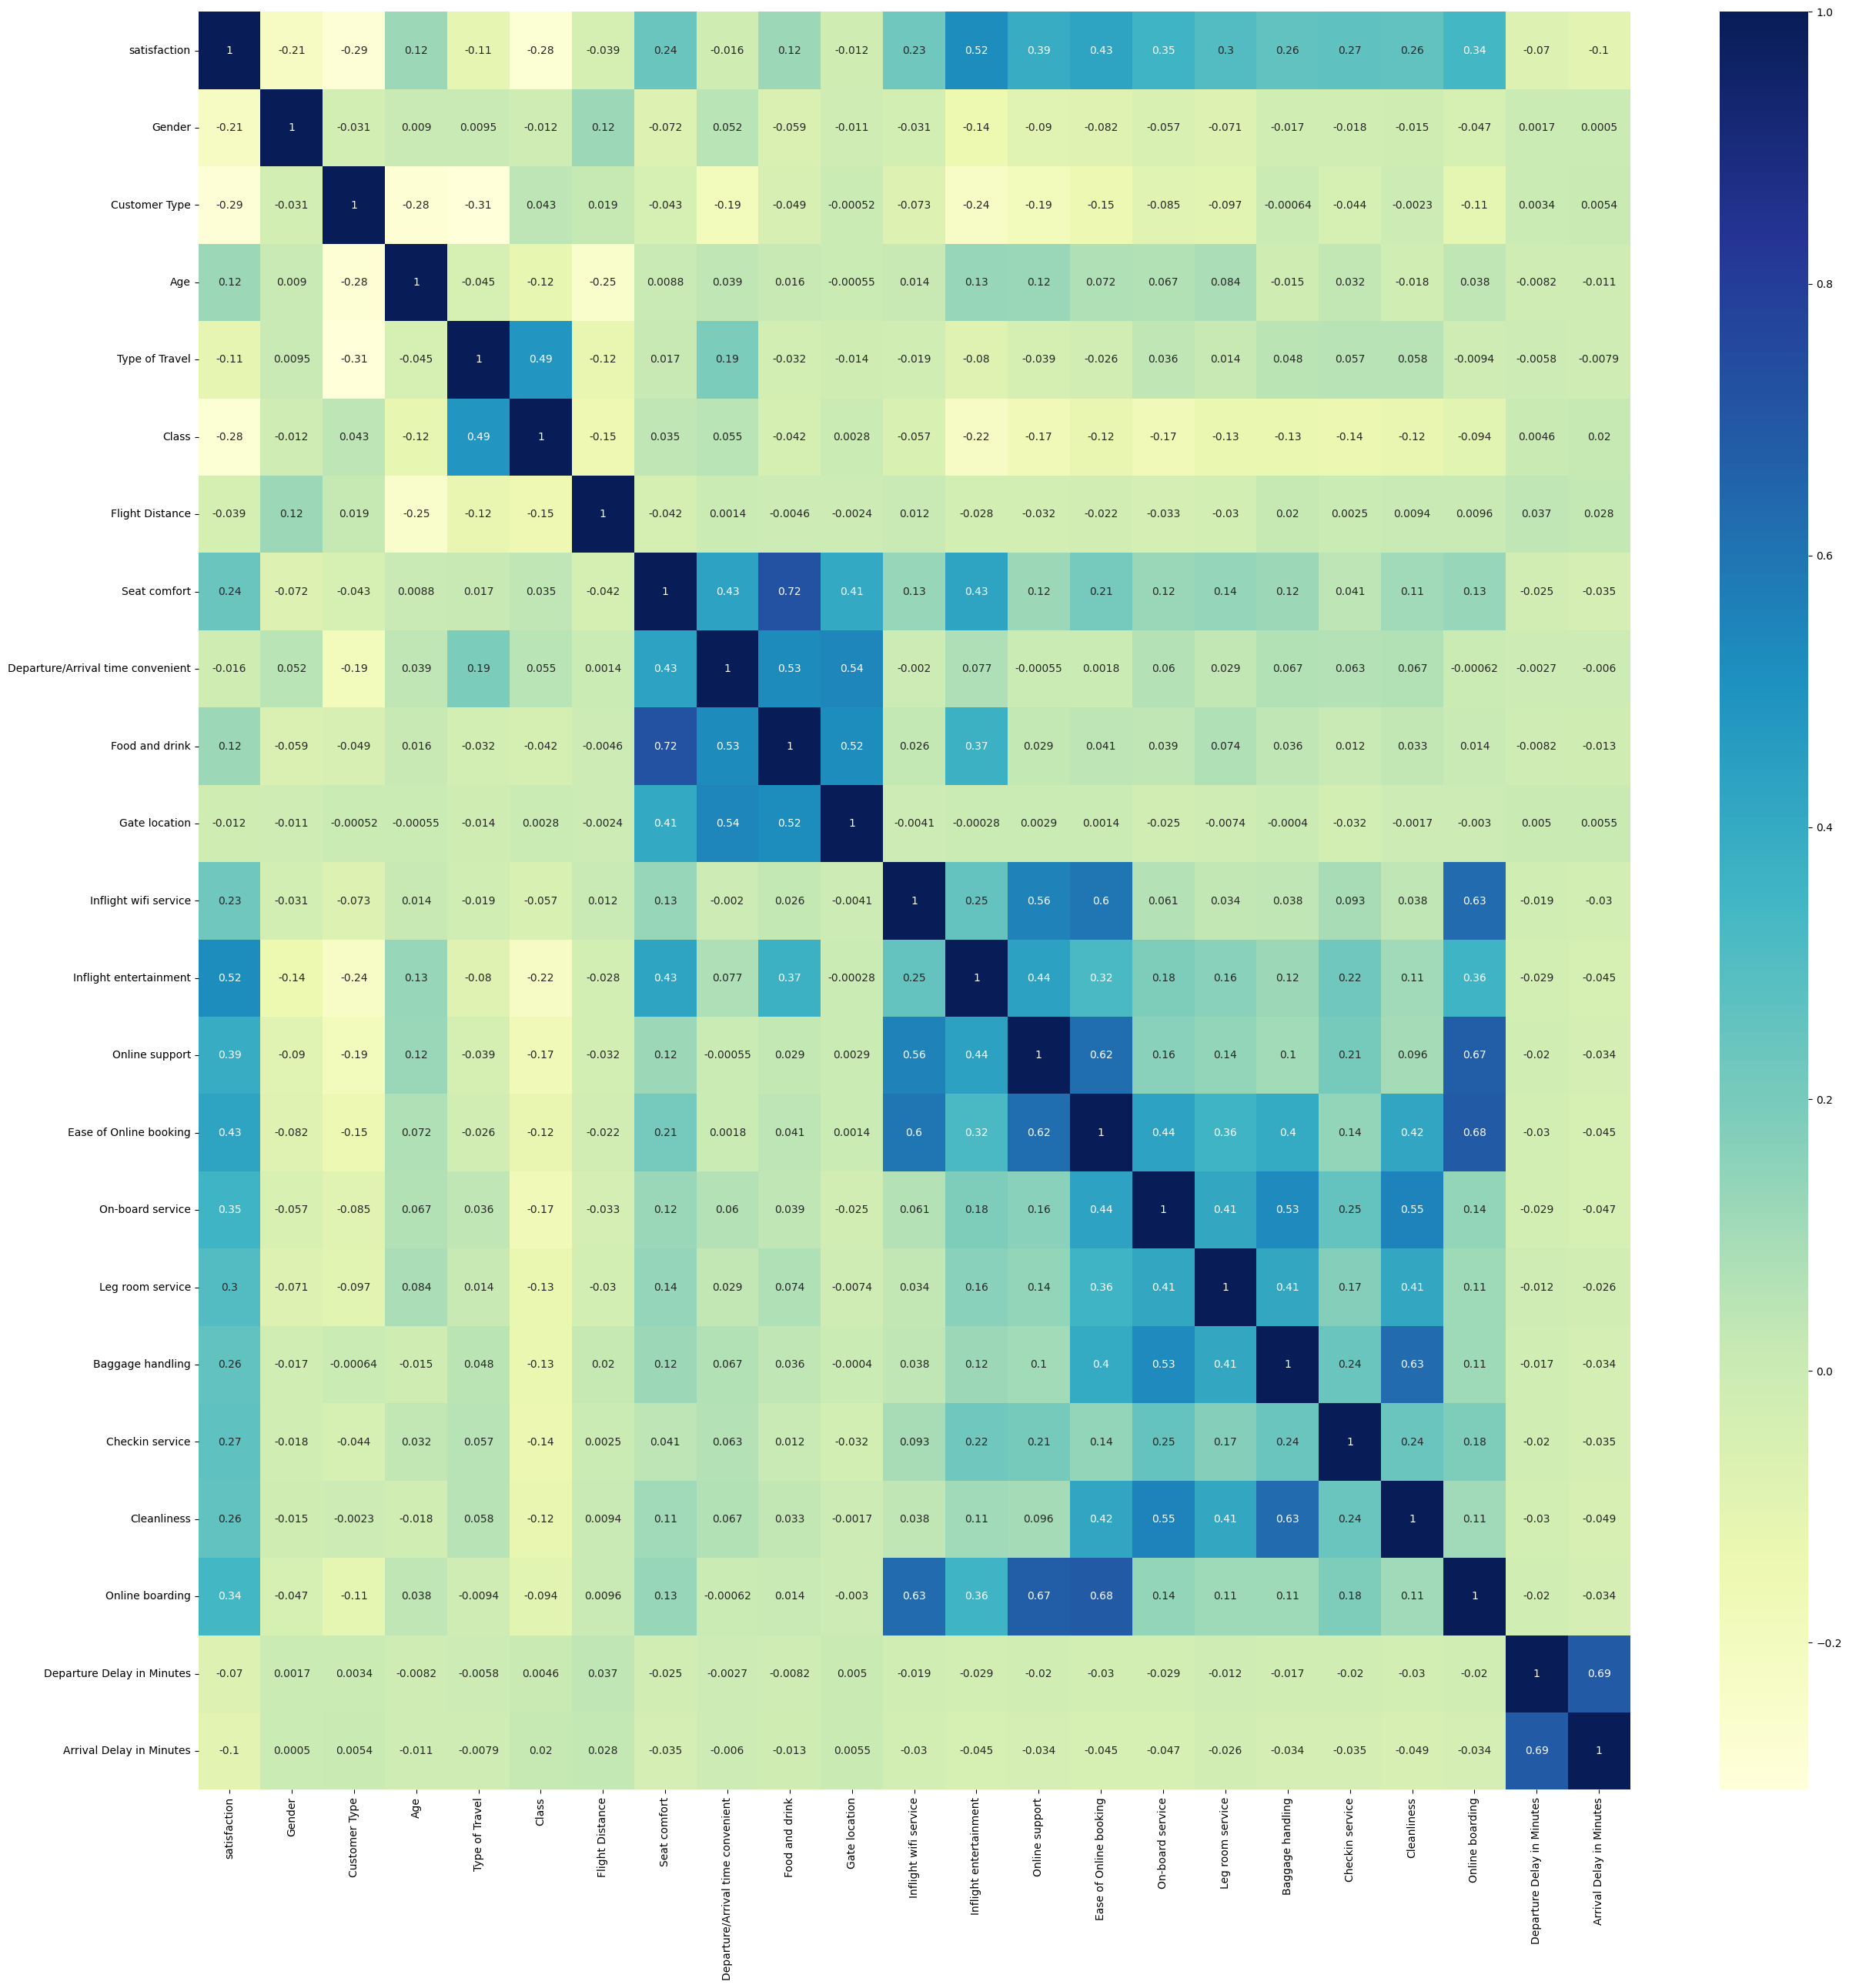

In [ ]:
#HEAT MAP FOR THE DATASET  OF AIRLINES showing relation
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

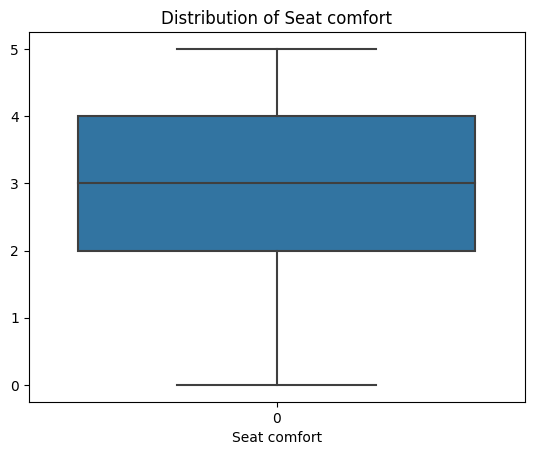

In [ ]:
#box plot of the Seat comfort coloumn
sns.boxplot(data['Seat comfort'])
plt.xlabel('Seat comfort')
plt.title('Distribution of Seat comfort')
plt.show()

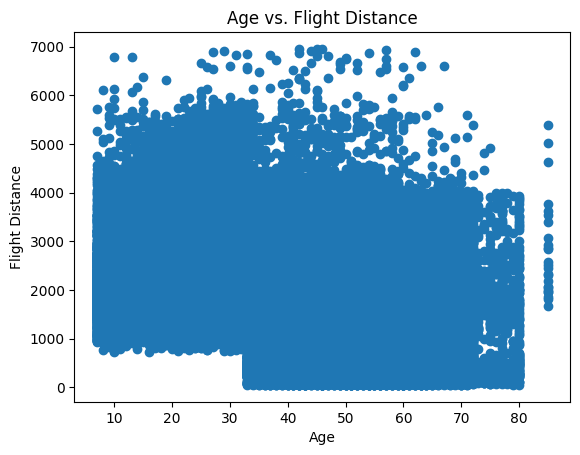

In [ ]:
#scatter plot of Age vs Flight Distance
plt.scatter(data['Age'], data['Flight Distance'])
plt.xlabel('Age')
plt.ylabel('Flight Distance')
plt.title('Age vs. Flight Distance')
plt.show()

## Pereforming Logistic Regression

splittting the data to train and test

In [ ]:
# Separating the features (X) and the target variable (y)
X = data.drop('satisfaction', axis=1)
y = data['satisfaction']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

By Decision Tree Classifier

In [ ]:
classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Predicting the target variable for the test set
y_pred = classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.9407914998460117

Classification report

In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93     11675
           1       0.95      0.95      0.95     14301

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



**Logistic Regression**

In [ ]:
#Scaling the X_train
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

In [ ]:
#Training Model
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression().fit(X_train_sc,y_train)

In [ ]:
#predicting
y_pred_sc=log_reg.predict(X_test_sc)

In [ ]:
#score with training data
log_reg.score(X_train_sc,y_train)

0.8359350939328611

In [ ]:
#score with test data
log_reg.score(X_test_sc,y_test)

0.8353865106251925

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_sc)

array([[ 9557,  2118],
       [ 2158, 12143]])


*   True Negative :9,580
*   True Positive: 12,165


*   False Positive: 2,095
*   False Negative: 2,136





In [ ]:
#calculating Precision tp/(tp+fp)
precision=12165/(12165+2095)
precision

0.853085553997195

In [ ]:
#calculating Recall tp/(tp+fn)
recall=12165/(12165+2136)
recall

0.8506398153975246

In [ ]:
#calculating precision score
f1_score=2*precision*recall/(precision+recall)
f1_score

0.8518609292391722

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=30)
model.fit (X_train, y_train)


RandomForestClassifier(n_estimators=30)

In [ ]:
model.score(X_test,y_test)

0.9572682476131814